In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading  database
df=pd.read_csv('Bias_correction_ucl.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Attribute Information

In [3]:

# 1. station - used weather station number: 1 to 25
# 2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
# 3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
# 4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
# 5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
# 6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
# 7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
# 8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
# 9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
# 10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
# 11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
# 12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
# 13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
# 14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
# 15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
# 16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
# 17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
# 18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
# 19. lat - Latitude (Â°): 37.456 to 37.645
# 20. lon - Longitude (Â°): 126.826 to 127.135
# 21. DEM - Elevation (m): 12.4 to 212.3
# 22. Slope - Slope (Â°): 0.1 to 5.2
# 23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
# 24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
# 25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [4]:
# Name of the columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
# Shape of the database 
df.shape

(7752, 25)

In [6]:
#information of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
#datatypes
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
#datatypes
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


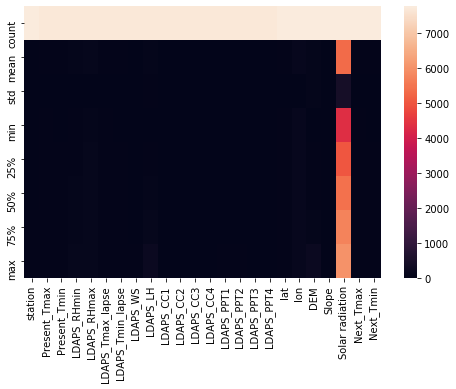

In [9]:
# Making  heatmap of describe.
plt.figure(figsize=(8,5))
sns.heatmap(df.describe())

In [10]:
#finding null values in the database
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [11]:
#Finding Correlation of the variables
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


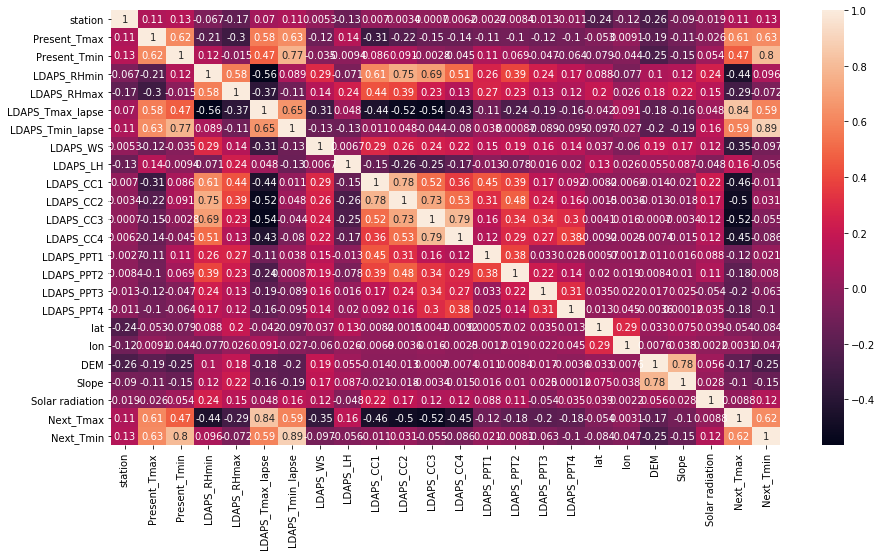

In [12]:
# Making Heatmap of correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

station                AxesSubplot(0.125,0.772143;0.133621x0.107857)
Present_Tmax        AxesSubplot(0.285345,0.772143;0.133621x0.107857)
Present_Tmin         AxesSubplot(0.44569,0.772143;0.133621x0.107857)
LDAPS_RHmin         AxesSubplot(0.606034,0.772143;0.133621x0.107857)
LDAPS_RHmax         AxesSubplot(0.766379,0.772143;0.133621x0.107857)
LDAPS_Tmax_lapse       AxesSubplot(0.125,0.642714;0.133621x0.107857)
LDAPS_Tmin_lapse    AxesSubplot(0.285345,0.642714;0.133621x0.107857)
LDAPS_WS             AxesSubplot(0.44569,0.642714;0.133621x0.107857)
LDAPS_LH            AxesSubplot(0.606034,0.642714;0.133621x0.107857)
LDAPS_CC1           AxesSubplot(0.766379,0.642714;0.133621x0.107857)
LDAPS_CC2              AxesSubplot(0.125,0.513286;0.133621x0.107857)
LDAPS_CC3           AxesSubplot(0.285345,0.513286;0.133621x0.107857)
LDAPS_CC4            AxesSubplot(0.44569,0.513286;0.133621x0.107857)
LDAPS_PPT1          AxesSubplot(0.606034,0.513286;0.133621x0.107857)
LDAPS_PPT2          AxesSubplot(0.

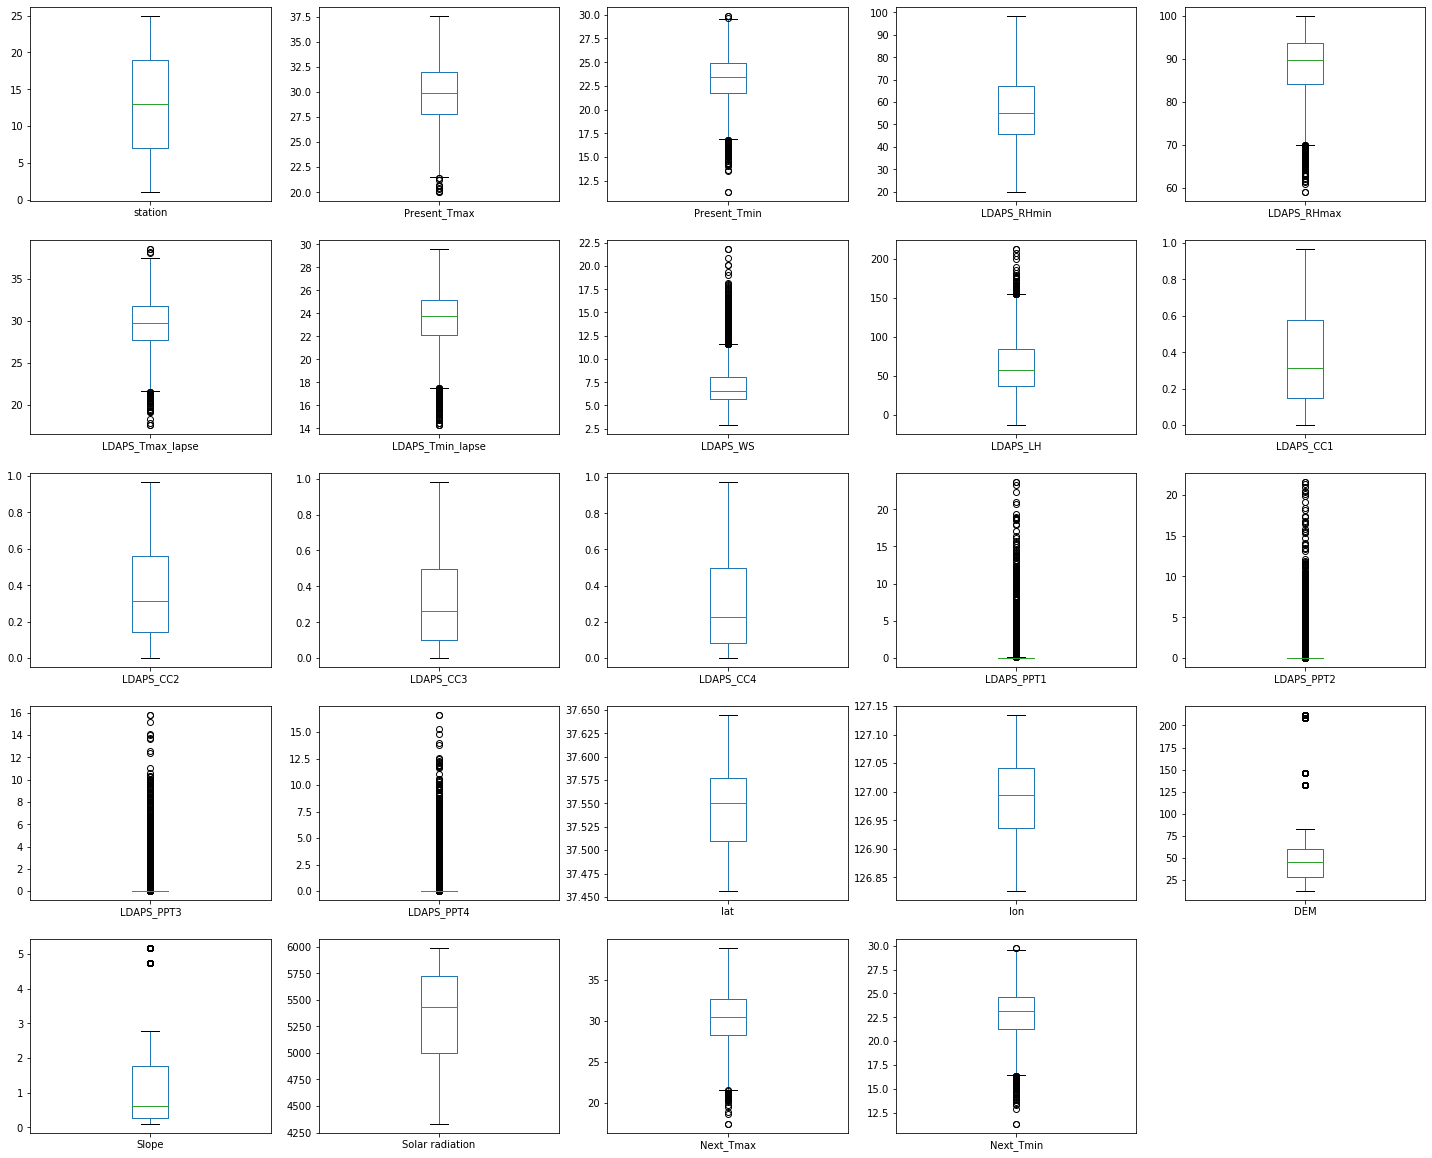

In [15]:
# Making Boxplot of all variables 
df.plot(kind='box',subplots=True,layout=(6,5),figsize=(25,25))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DA73F4548>,
      dtype=object)

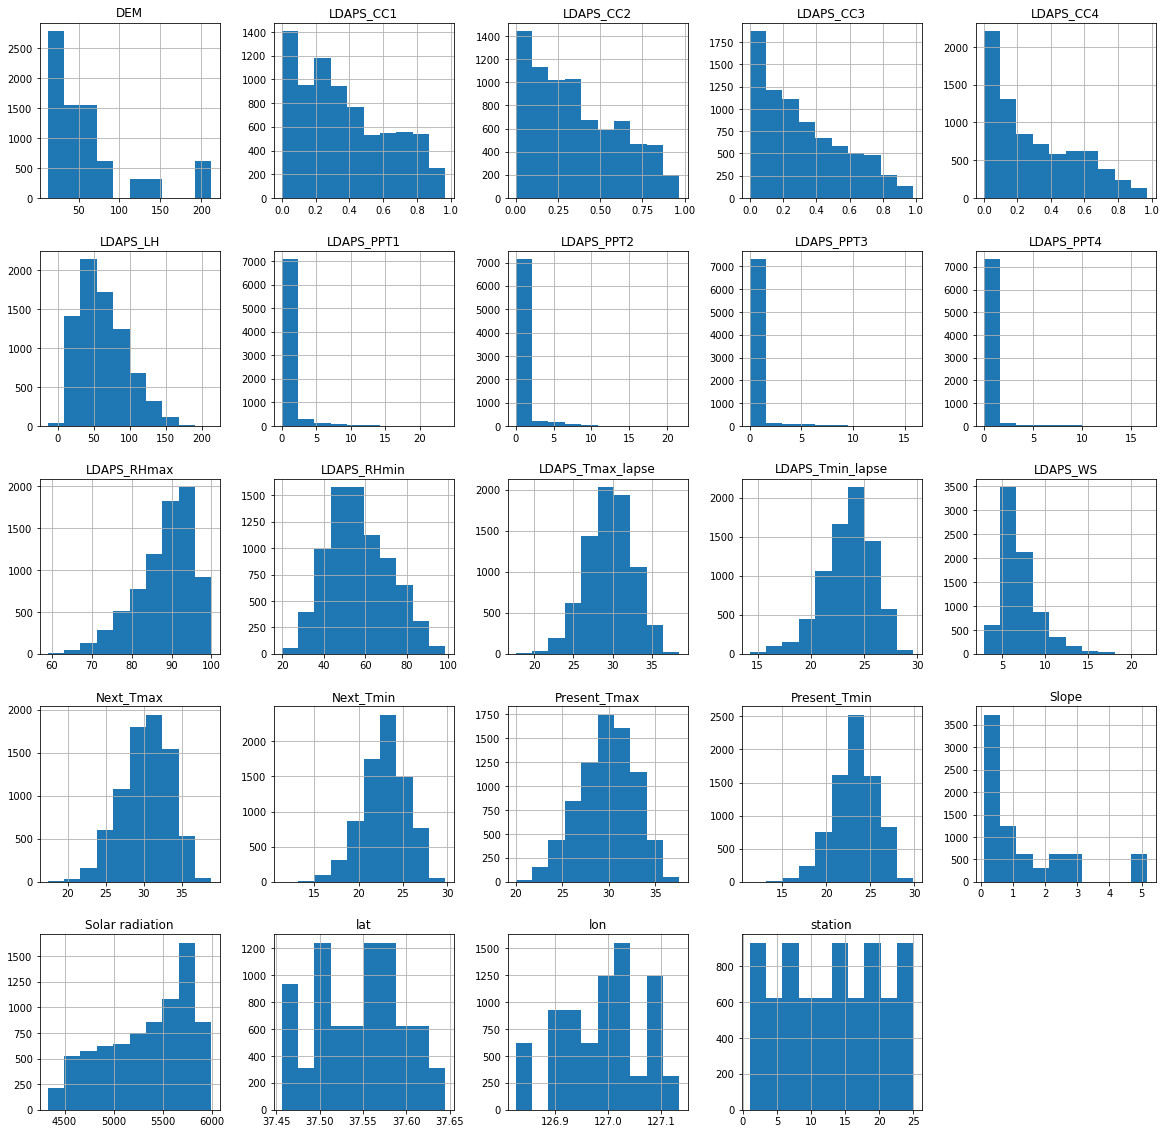

In [16]:
# Making Histrogram of all variables
df.hist(figsize=(20,20))

{'bodies': [<matplotlib.collections.PolyCollection at 0x17daad77108>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x17daad6b208>,
 'cmins': <matplotlib.collections.LineCollection at 0x17daad77bc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x17daad77388>}

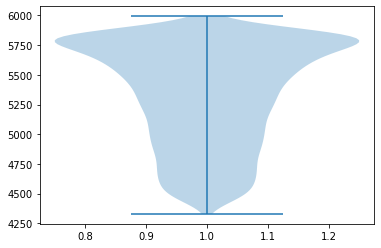

In [37]:
# Making Violinplot  of Solar radiation.
plt.violinplot(df["Solar radiation"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x17daae31ec8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x17daad6be48>,
 'cmins': <matplotlib.collections.LineCollection at 0x17daae3d8c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x17daae3dd88>}

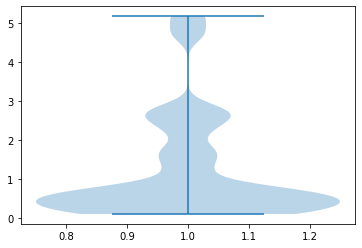

In [38]:
# Making Violinplot  of Slope.
plt.violinplot(df['Slope'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x17daae97d88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x17daae8f788>,
 'cmins': <matplotlib.collections.LineCollection at 0x17daae97f08>,
 'cbars': <matplotlib.collections.LineCollection at 0x17daae97fc8>}

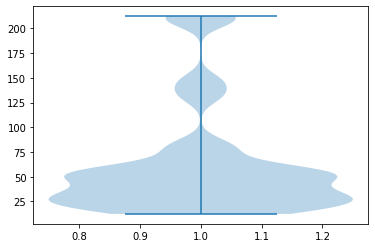

In [39]:
# Making Violinplot  of DEM.
plt.violinplot(df['DEM'])

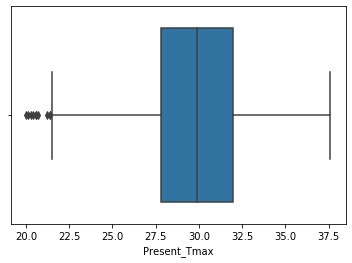

In [40]:
# Making boxplot  of  Present_Tmax.
sns.boxplot(df['Present_Tmax'])

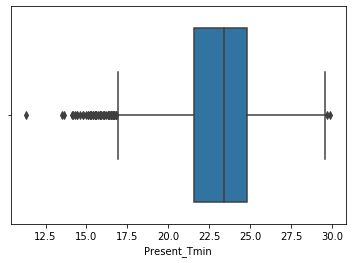

In [41]:
# Making boxplot  of  Present_Tmin .
sns.boxplot(df['Present_Tmin'])

In [17]:
# Droping Nan values.
df.dropna(how='any', inplace= True)

In [18]:
# Unique values of all columns
for col in df:
    print(col)
    print(df[col].unique())
    print('')

station
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]

Date
['2013-06-30' '2013-07-01' '2013-07-02' '2013-07-03' '2013-07-04'
 '2013-07-05' '2013-07-06' '2013-07-07' '2013-07-08' '2013-07-09'
 '2013-07-10' '2013-07-11' '2013-07-12' '2013-07-13' '2013-07-14'
 '2013-07-15' '2013-07-16' '2013-07-17' '2013-07-18' '2013-07-19'
 '2013-07-20' '2013-07-21' '2013-07-22' '2013-07-23' '2013-07-24'
 '2013-07-25' '2013-07-26' '2013-07-27' '2013-07-28' '2013-07-29'
 '2013-07-30' '2013-07-31' '2013-08-01' '2013-08-02' '2013-08-03'
 '2013-08-04' '2013-08-05' '2013-08-06' '2013-08-07' '2013-08-08'
 '2013-08-09' '2013-08-11' '2013-08-12' '2013-08-13' '2013-08-14'
 '2013-08-15' '2013-08-16' '2013-08-17' '2013-08-18' '2013-08-19'
 '2013-08-20' '2013-08-21' '2013-08-22' '2013-08-23' '2013-08-24'
 '2013-08-25' '2013-08-26' '2013-08-27' '2013-08-28' '2013-08-29'
 '2013-08-30' '2014-06-30' '2014-07-01' '2014-07-02' '2014-07-03'
 '2014-07-04' '2014-07-05

In [19]:
# droping ID column from  dataset
df= df.drop(["Date"],axis = 1)

In [20]:
# Calculating Zscore 
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.66460654, 0.35331763, 0.74802891, ..., 1.51056517, 0.36686121,
        0.68926525],
       [1.52605214, 0.72513836, 0.66472063, ..., 1.22299734, 0.08306779,
        0.1655135 ],
       [1.38749775, 0.62403311, 0.0433998 , ..., 1.20960169, 0.27589451,
        0.39852685],
       ...,
       [1.38359018, 2.17321212, 2.53915704, ..., 2.09517477, 0.6239635 ,
        1.93821173],
       [1.52214457, 2.17321212, 2.28923218, ..., 2.10667071, 0.52755014,
        1.65619156],
       [1.66069897, 2.20691387, 2.41419461, ..., 2.07648676, 0.78465243,
        2.2202319 ]])

# Splitting Data into target and Input¶

In [21]:
x=df.iloc[:,0:-2]
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535


# Predicting Next_Tmax

In [22]:
y=df.iloc[:,-2]
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7588, dtype: float64

In [23]:
#  Using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


# Importing Necessary libraries

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [25]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x,y)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print(" We are getting maximum  r2 score corresponding to",final_i,"is",max_r_score)
    return final_i


In [26]:
# using Grid search CV to find best  parameters of different algorithim .
knn=KNeighborsRegressor()
parameters={"n_neighbors" :(5,20) , 'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']}
gd=GridSearchCV(knn,parameters)
gd.fit(x,y)
print(" Best parameters of KNeighborsRegressor is :-")
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1] , 'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(" Best parameters of Lasso is :-")
print(gd.best_params_)
print("\n")

dtc=DecisionTreeRegressor()
parameters={"criterion" :( 'mse', 'friedman_mse', 'mae') ,'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
print(" Best parameters of DecisionTreeRegressor is :-")
print(gd.best_params_)
print("\n")


 Best parameters of KNeighborsRegressor is :-
{'algorithm': 'auto', 'n_neighbors': 20}


 Best parameters of Lasso is :-
{'alpha': 0.001, 'selection': 'cyclic'}


 Best parameters of DecisionTreeRegressor is :-
{'criterion': 'friedman_mse', 'max_features': 'auto'}




In [27]:
# Finding best r2 score value for Linear Regression 
print("Linear Regression")
print("................. ")
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print(" ")
print("#############################################################################")
print(" ")


# Finding best r2 score value for KNeighbors regressor 
print("KNeighbors regressor ")
print("..................... ")
knn=KNeighborsRegressor(n_neighbors= 20 , algorithm = 'auto')
i=maxr2_score(knn,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knn,x,y,cv=135,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print(" ")
print("##############################################################################")
print(" ")

# Finding best r2 score value for Lasso Regressor 
print("Lasso Regressor")
print("................ ")
lsreg=Lasso(alpha=0.001 , selection = 'cyclic')
i=maxr2_score(lsreg,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=63,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print(" ")
print("################################################################################")
print(" ")

# Finding best r2 score value for DecisionTreeRegressor
print("DecisionTreeRegressor")
print("...................... ")
dtc=DecisionTreeRegressor( criterion = 'mae',  max_features = 'auto' )
i=maxr2_score(dtc,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtc,x,y,cv=10,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtc,x,y,cv=5,scoring="r2").std())
print(" ")
print("#################################################################################")
print(" ")




Linear Regression
................. 
 We are getting maximum  r2 score corresponding to 70 is 0.7993775317549319
 
Mean r2 score for Linear Regression: 0.7216067545539057
standard deviation in r2 score for Linear Regression 0.047454471236619396
 
#############################################################################
 
KNeighbors regressor 
..................... 
 We are getting maximum  r2 score corresponding to 84 is 0.6110572461859052
 
Mean r2 score for KNeighbor  Regression: -1.5650301928491932
standard deviation in r2 score for KNeighbor   Regression 0.21888733015404488
 
##############################################################################
 
Lasso Regressor
................ 
 We are getting maximum  r2 score corresponding to 70 is 0.7991250442155957
 
Mean r2 score for Lasso Regression: 0.4212289104453331
standard deviation in r2 score for Lasso Regression 0.047928912551686055
 
################################################################################
 
Dec

# Since DecisionTreeRegressor is giving better result so take it  as final model.

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
dtc=DecisionTreeRegressor(criterion = 'mae'  , max_features = 'auto')
dtc.fit(x,y)
y_pred=dtc.predict(x_test)

In [34]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.0
r2_score is: 1.0


# Saving the model

In [44]:
from  sklearn.externals import joblib
joblib.dump(dtc,"temperature.pkl")

['temperature.pkl']

# ######

# Now predicting Next_Tmin 

In [45]:
x=df.iloc[:,0:-1]
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6


In [46]:
y=df.iloc[:,-1]
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7588, dtype: float64

In [47]:
#  Using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


# Importing Necessary libraries

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [49]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x,y)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print(" We are getting maximum  r2 score corresponding to",final_i,"is",max_r_score)
    return final_i


In [50]:
# using Grid search CV to find best  parameters of different algorithim .
knn=KNeighborsRegressor()
parameters={"n_neighbors" :(5,20) , 'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']}
gd=GridSearchCV(knn,parameters)
gd.fit(x,y)
print(" Best parameters of KNeighborsRegressor is :-")
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1] , 'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(" Best parameters of Lasso is :-")
print(gd.best_params_)
print("\n")

dtc=DecisionTreeRegressor()
parameters={"criterion" :( 'mse', 'friedman_mse', 'mae') ,'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
print(" Best parameters of DecisionTreeRegressor is :-")
print(gd.best_params_)
print("\n")


 Best parameters of KNeighborsRegressor is :-
{'algorithm': 'auto', 'n_neighbors': 20}


 Best parameters of Lasso is :-
{'alpha': 0.01, 'selection': 'random'}


 Best parameters of DecisionTreeRegressor is :-
{'criterion': 'mae', 'max_features': 'auto'}




In [53]:
# Finding best r2 score value for Linear Regression 
print("Linear Regression")
print("................. ")
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print(" ")
print("#############################################################################")
print(" ")


# Finding best r2 score value for KNeighbors regressor 
print("KNeighbors regressor ")
print("..................... ")
knn=KNeighborsRegressor(n_neighbors= 20 , algorithm = 'auto')
i=maxr2_score(knn,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knn,x,y,cv=135,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print(" ")
print("##############################################################################")
print(" ")

# Finding best r2 score value for Lasso Regressor 
print("Lasso Regressor")
print("................ ")
lsreg=Lasso(alpha=0.01 , selection = 'random')
i=maxr2_score(lsreg,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=63,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print(" ")
print("################################################################################")
print(" ")




Linear Regression
................. 
 We are getting maximum  r2 score corresponding to 60 is 0.8680826598838364
 
Mean r2 score for Linear Regression: 0.7999875234346793
standard deviation in r2 score for Linear Regression 0.08588361648725636
 
#############################################################################
 
KNeighbors regressor 
..................... 
 We are getting maximum  r2 score corresponding to 45 is 0.6221365729110178
 
Mean r2 score for KNeighbor  Regression: -1.557825977838988
standard deviation in r2 score for KNeighbor   Regression 0.35795300900326893
 
##############################################################################
 
Lasso Regressor
................ 
 We are getting maximum  r2 score corresponding to 60 is 0.8678193936816405
 
Mean r2 score for Lasso Regression: 0.5207982998193346
standard deviation in r2 score for Lasso Regression 0.082696303096404
 
################################################################################
 


# Since Linear Regression is giving better result so take it as final model

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x,y)
y_pred=lreg.predict(x_test)

In [56]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.9265942817707408
r2_score is: 0.8680826598838364


# Saving the model

In [57]:
from  sklearn.externals import joblib
joblib.dump(dtc,"temperature56.pkl")

['temperature56.pkl']